# Diffusion equation, Euler method
Gilbert François Duivesteijn

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's solve the equation

\begin{equation}\label{eq:1}
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}
\end{equation}

in a 1D space. Writing out numerically the diffusion part with second order precision, is:

\begin{equation}\label{eq:2}
\frac{\partial u}{\partial t} = k \frac{u_{i-1} - 2u_i + u_{i+1}}{\Delta x^2}
\end{equation}

Writing the time derivative numerically with first order precision gives:
\begin{equation}\label{eq:3}
 \frac{\partial u}{\partial t} = \frac{u_{t+1} - u_t}{\Delta t}
\end{equation}

Combining (\ref{eq:2}) and (\ref{eq:3}) gives us a way to solve (\ref{eq:1}) with the Euler method:
\begin{equation}\label{eq:4}
u_{t+1} = u_t + \frac{\partial u}{\partial t}\cdot \Delta t
\end{equation}

Combining (\ref{eq:2}) and (\ref{eq:4}) gives the final equation to solve:
\begin{equation}\label{eq:5}
u_{i+1} = u_i + k \frac{\Delta t}{\Delta x^2} \left(u_{i-1} - 2u_i + u_{i+1} \right)
\end{equation}

where $k \frac{\Delta t}{\Delta x^2}$ (known as CFL number) should be $<1$ for numerical stability.

## Example problem

Let's assume a 1D space with 2 walls. At the initial state the walls and the air in between has a temperature of 0 degrees Celcius. At time $t_0$ the left wall is set to 100 degrees Celcius and the right wall is kept at 0 degrees celcius. How does the air in between the walls heat up over time?

In [21]:
alpha = 0.001
T0 = 0                # Initial air temperature
B0 = 100              # Boundary temperature at x=0 (Dirichlet boundary condition)
B1 = 0                # Boundary temperature at x=L (Dirichlet boundary condition)
n = 50                # number of nodes
L = 1                 # distance between the walls
t_max = 240           # max time
m = t_max*10          # time steps

delta_t = t_max / m   # time increment for the Euler method
delta_x = L/n         # space delta between nodes
delta_x2 = delta_x**2

CFL = alpha * delta_t / delta_x2
print(f"CFL = {CFL:0.3f}")

CFL = 0.250


In [22]:
# Initial u
u = np.ones(shape=(m, n)) * T0

# Differential matrix 
D = np.zeros(shape=(n, n))
for i in range(1, n-1):
    D[i, i-1] = 1
    D[i, i] = -2
    D[i, i+1] = 1

# partial derivative vector du/dt
dudt = np.zeros(shape=(n))

In [23]:
print("\nu =")
print(u)
print("\nD =")
print(D)


u =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

D =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [24]:
for t in range(0, m-1):
    u[t, 0] = B0
    u[t, n-1] = B1
    dudt = alpha * np.matmul(D, u[t])/delta_x2
    u[t+1] = u[t] + dudt * delta_t

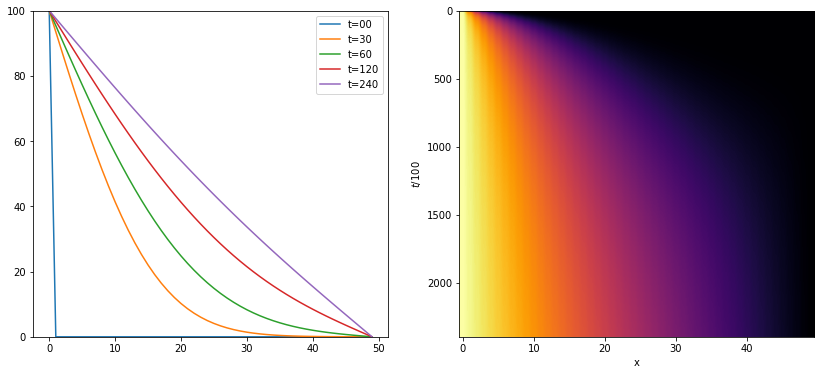

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_ylim(0,max(B0,B1))
axs[0].plot(u[0], label="t=00")
axs[0].plot(u[299], label="t=30")
axs[0].plot(u[599], label="t=60")
axs[0].plot(u[1199], label="t=120")
axs[0].plot(u[2399], label="t=240")
axs[0].legend()
axs[1].imshow(u, aspect="auto", cmap="inferno")
axs[1].set_xlabel("x")
axs[1].set_ylabel("$t/100$")
plt.show()

## Alternative writing for the solver

Using the CFL number in the equation:

In [26]:
# Initial u
u = np.ones(shape=(m, n)) * T0

# Differential matrix 
D = np.zeros(shape=(n, n))
for i in range(1, n-1):
    D[i, i-1] = 1
    D[i, i] = -2
    D[i, i+1] = 1

# partial derivative vector du/dt
dudt = np.zeros(shape=(n))

In [27]:
for t in range(0, m-1):
    u[t, 0] = B0
    u[t, n-1] = B1
    u[t+1] = u[t] + CFL * np.matmul(D, u[t])

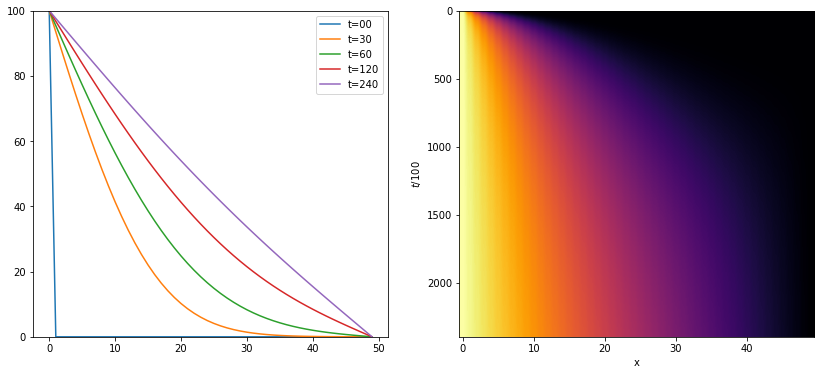

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_ylim(0,max(B0,B1))
axs[0].plot(u[0], label="t=00")
axs[0].plot(u[299], label="t=30")
axs[0].plot(u[599], label="t=60")
axs[0].plot(u[1199], label="t=120")
axs[0].plot(u[2399], label="t=240")
axs[0].legend()
axs[1].imshow(u, aspect="auto", cmap="inferno")
axs[1].set_xlabel("x")
axs[1].set_ylabel("$t/100$")
plt.show()